# Task 1 
Clean and preprocess the data:

Handle missing values by choosing appropriate methods such as imputation, removal, or flagging. Justify your chosen method based on the data and context.
Detect and address outliers that could skew the analysis or predictions. Decide whether to cap, transform, or remove outliers based on their nature and potential impact.
Standardise or normalise numerical features to ensure consistent scales across variables. This step is crucial for preparing the data for machine learning algorithms.
Encode categorical variables using techniques like one-hot encoding to transform them into a numerical form appropriate for analysis.

In [3]:
import pandas as pd                               # Library for data manipulation
from src.visualisation import (                   # Functions for data visualisation
    plot_histogram,
    plot_pie,
    plot_box,
    plot_bar,
    plot_scatter,
    plot_sunburst
)


### Import Data Source

In [46]:
xls = 'data/Customer_Churn_Data_Large.xlsx'

In [47]:
customer_demographics_df = pd.read_excel(xls, sheet_name='Customer_Demographics')
transaction_history_df = pd.read_excel(xls, sheet_name='Transaction_History')
customer_service_df = pd.read_excel(xls, sheet_name='Customer_Service')
online_activity_df = pd.read_excel(xls, sheet_name='Online_Activity')
churn_status_df = pd.read_excel(xls, sheet_name='Churn_Status')


### Statistical Analysis of Customer Data

The statistical analysis was performed on the customer churn dataset to understand the structure and quality of the data. It provides an overview of the customer demographics, transaction history, customer service interactions, online activity, and churn status. The analysis includes examining key statistics such as the mean, standard deviation, unique values, and missing data percentage for each feature.

### Key Conclusions:
1. **Customer Demographics**:
   - All columns in the `Customer Demographics` dataset are complete, with no missing values.
   - The majority of customers are in the age range of 18 to 69.
   - Most customers are classified as "Female," "Widowed," and belong to the "High" income level.

2. **Transaction History**:
   - This dataset contains no missing values.
   - Spending levels vary significantly, with the most common product category being "Electronics."
   - A high proportion of transactions are associated with the "Medium" spending category.

3. **Customer Service**:
   - The `Customer Service` dataset contains 206 entries with no missing values.
   - Most interactions are categorized as "Feedback" with a "Resolved" status.
   - The churn status for all entries is 1 (indicating churned customers).

4. **Online Activity**:
   - This dataset contains 204 entries with no missing values.
   - The most common service used by customers is the "Mobile App."
   - Customers exhibit moderate login frequencies.

5. **Churn Status**:
   - The churn status distribution is imbalanced, with only 20.4% of the customers exhibiting churn (ChurnStatus = 1).
   - This suggests that the majority of customers have not churned.

### Conclusion:
The datasets are clean with no missing data. The churn status distribution indicates an opportunity for further exploration into the factors influencing customer retention and churn prediction.


In [113]:
def print_missing_percent(df, name):
    print(f"\n{name} Missing Percentage:")
    missing_percent = df.isnull().mean() * 100
    print(missing_percent)

print("Customer Demographics Info:")
print(customer_demographics_df.info())
print(customer_demographics_df.columns)
print(customer_demographics_df.describe(include='all'))
print_missing_percent(customer_demographics_df, "Customer Demographics")

print("\nTransaction History Info:")
print(transaction_history_df.info())
print(transaction_history_df.describe(include='all'))
print(transaction_history_df.columns)
print_missing_percent(transaction_history_df, "Transaction History")

print("\nCustomer Service Info:")
print(customer_service_df.info())
print(customer_service_df.describe(include='all'))
print(customer_service_df.columns)
print_missing_percent(customer_service_df, "Customer Service")

print("\nOnline Activity Info:")
print(online_activity_df.info())
print(online_activity_df.describe(include='all'))
print(online_activity_df.columns)
print_missing_percent(online_activity_df, "Online Activity")

print("\nChurn Status Info:")
print(churn_status_df.info())
print(churn_status_df.describe(include='all'))
print(churn_status_df.columns)
print_missing_percent(churn_status_df, "Churn Status")

Customer Demographics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None
Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')
         CustomerID          Age Gender MaritalStatus IncomeLevel
count   1000.000000  1000.000000   1000          1000        1000
unique          NaN          NaN      2             4           3
top             NaN          NaN      F       Widowed        High
freq            NaN          NaN    513           276         349
mean     500.500000    43.267000    NaN           NaN         NaN
std      288.819436    15.2

### Exploratory Data Analysis
A detail analysis was conducted to undestand the behaviour of Churn Customer

In [12]:

# Merging the customer demographics and churn status DataFrames
customeer_demo_df = pd.merge(customer_demographics_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
customeer_demo_df = customeer_demo_df[customeer_demo_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
# print(customeer_demo_df.head())


Age group 40 - 44 have most of the Churned i.e 25

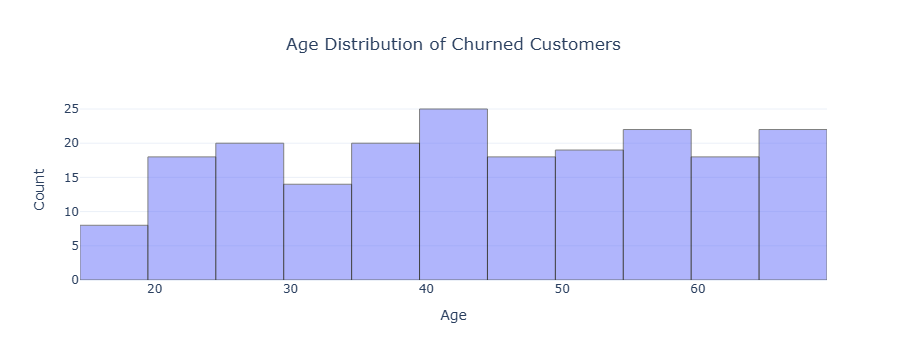

In [14]:
# Histogram for Age Distribution of Churned Customers
fig = plot_histogram(customeer_demo_df, 
                     x_column='Age', 
                     title='Age Distribution of Churned Customers', 
                     x_label='Age', 
                     y_label='Count', 
                     barmode='overlay')
fig.show()


The gender ratio approximately equal

In [19]:
# Pie chart for Gender Distribution of Churned Customers
fig = plot_pie(churned_customers_df, 
               names_column='Gender', 
               title="Gender Distribution of Churned Customers")
fig.show()


NameError: name 'churned_customers_df' is not defined

Most of the people were married with churn status of 60

In [20]:
# Bar chart for Churn Status by Marital Status
fig = plot_bar(churned_customers_df, 
               x_column='MaritalStatus', 
               y_column='ChurnStatus', 
               title="Churn Status by Marital Status", 
               x_label="Marital Status", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


NameError: name 'churned_customers_df' is not defined

These group were between low to medium income

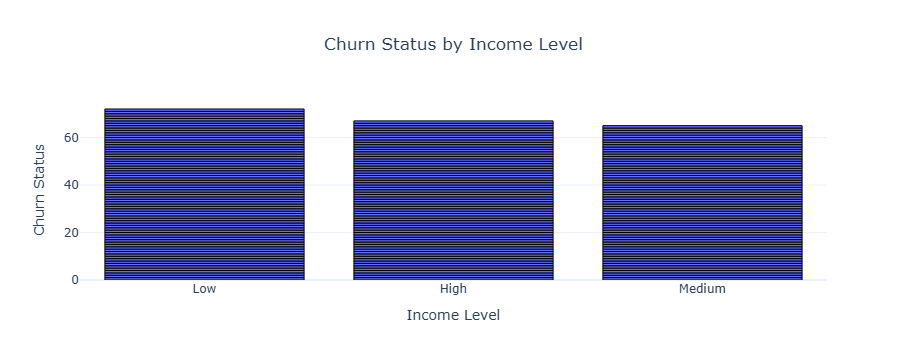

In [81]:
# Bar chart for Churn Status by Income Level
fig = plot_bar(churned_customers_df, 
               x_column='IncomeLevel', 
               y_column='ChurnStatus', 
               title="Churn Status by Income Level", 
               x_label="Income Level", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


Upon compiling the behaviour of customers it was observed that customer that are at high risk have the following features:
- Gender : Male
- Age group: 31-45
- Marital Status: Widowed
- Income Level: Low to Medium

C:\Users\alina\AppData\Local\Temp\ipykernel_19792\3547493485.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\alina\anacon

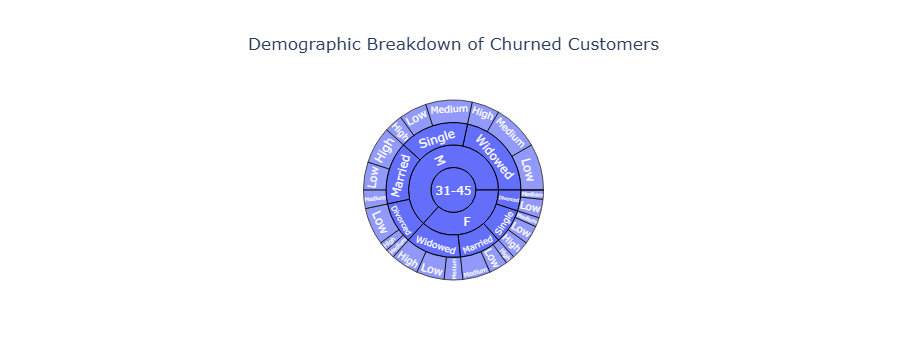

In [82]:
# Step 1: Create Age Groups (corrected number of labels)
churned_customers_df['AgeGroup'] = pd.cut(churned_customers_df['Age'], 
                                            bins=[0, 18, 30, 45, 60, 100], 
                                            labels=["0-18", "19-30", "31-45", "46-60", "60+"])

# Step 2: Create the Sunburst chart
fig = plot_sunburst(churned_customers_df, 
                    path_columns=['AgeGroup', 'Gender', 'MaritalStatus', 'IncomeLevel'], 
                    title="Demographic Breakdown of Churned Customers")
fig.show()


In [15]:
# Merging the customer demographics and churn status DataFrames
transaction_history_df = pd.merge(transaction_history_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
transaction_history_df = transaction_history_df[transaction_history_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
# print(transaction_history_df.head())


Electronic Equipment has most of the Churn Status

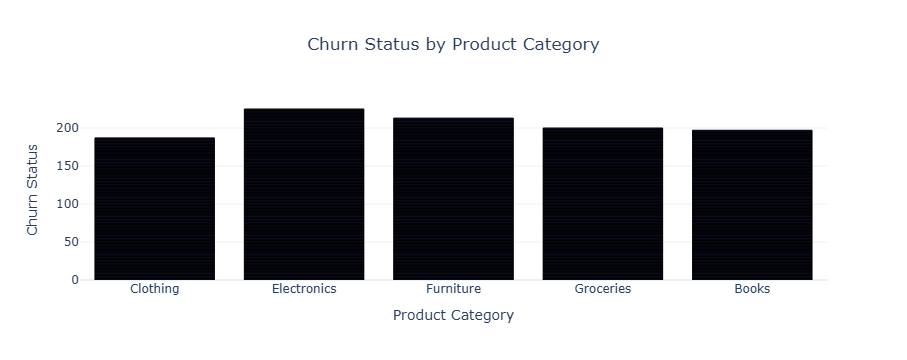

In [16]:
# Bar chart for Product Category and Churn Status
fig = plot_bar(transaction_history_df, 
               x_column='ProductCategory', 
               y_column='ChurnStatus', 
               title="Churn Status by Product Category", 
               x_label="Product Category", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


The Income Level of the Churn group is Medium

In [1]:
# Categorizing Amount Spent into bins (Low, Medium, High)
transaction_history_df['SpendingCategory'] = pd.cut(
    transaction_history_df['AmountSpent'],
    bins=[0, 100, 500, 1000, float('inf')],
    labels=["Low", "Medium", "High", "Very High"]
)

# Bar chart for Spending Category and Churn Status
fig = plot_bar(transaction_history_df, 
               x_column='SpendingCategory', 
               y_column='ChurnStatus', 
               title="Churn Status by Spending Category", 
               x_label="Spending Category", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


NameError: name 'pd' is not defined

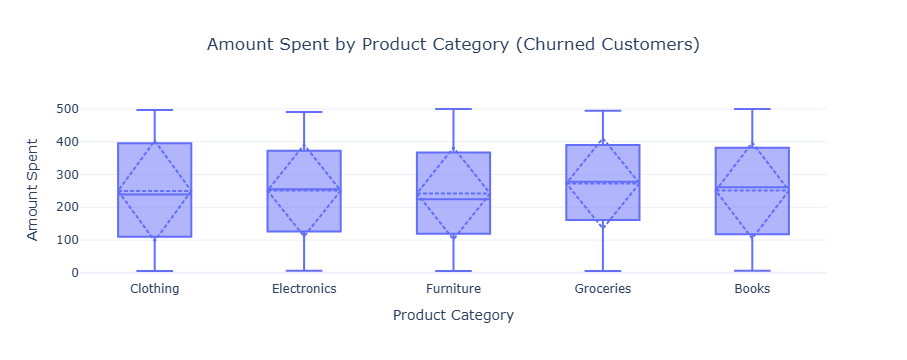

In [18]:
# Box plot for Amount Spent by Product Category
fig = plot_box(transaction_history_df, 
               x_column='ProductCategory', 
               y_column='AmountSpent', 
               title="Amount Spent by Product Category (Churned Customers)", 
               x_label="Product Category", 
               y_label="Amount Spent")
fig.show()


C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



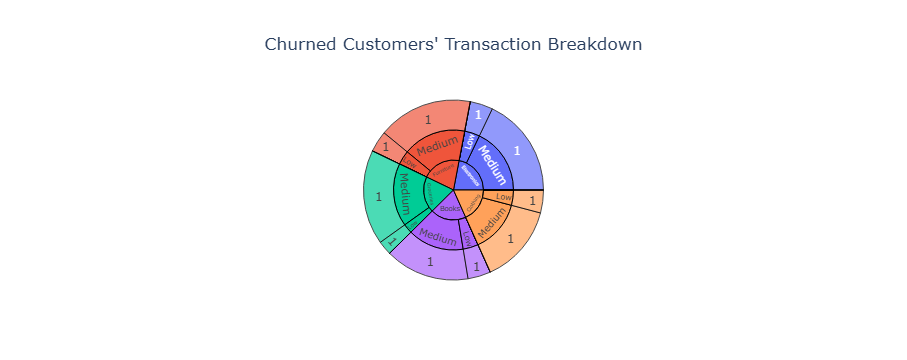

In [89]:
# Create the Sunburst chart for Churned Customers' Transactions
fig = plot_sunburst(transaction_history_df, 
                    path_columns=['ProductCategory', 'SpendingCategory', 'ChurnStatus'], 
                    title="Churned Customers' Transaction Breakdown")
fig.show()


It was observed that spikes were observed after every alternate months

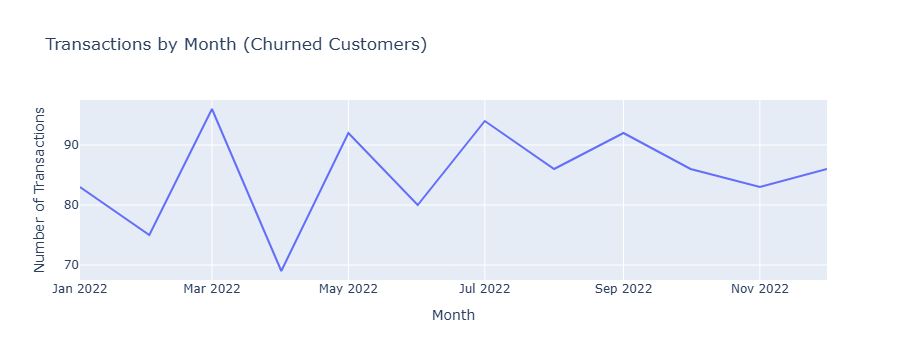

In [90]:
# Convert TransactionMonth from Period to string format
transaction_history_df['TransactionMonth'] = transaction_history_df['TransactionDate'].dt.to_period('M').astype(str)

# Aggregating the number of transactions by month
monthly_transactions = transaction_history_df.groupby('TransactionMonth').size()

# Line plot to visualize transaction trends over months
fig = px.line(monthly_transactions, x=monthly_transactions.index, y=monthly_transactions, title="Transactions by Month (Churned Customers)")
fig.update_layout(xaxis_title="Month", yaxis_title="Number of Transactions")
fig.show()


In [94]:
# Merging the customer demographics and churn status DataFrames
customer_service_df = pd.merge(customer_service_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
customer_service_df = customer_service_df[customer_service_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
print(customer_service_df.head())


    CustomerID  InteractionID InteractionDate InteractionType  \
1            2           3329      2022-03-17         Inquiry   
6            8           4191      2022-04-29         Inquiry   
7            8           8937      2022-09-13        Feedback   
18          16           5761      2022-06-30         Inquiry   
19          16           9278      2022-09-08         Inquiry   

   ResolutionStatus  ChurnStatus  
1          Resolved            1  
6        Unresolved            1  
7        Unresolved            1  
18         Resolved            1  
19         Resolved            1  


It is observed that the people who had churn status high had there issues resolved

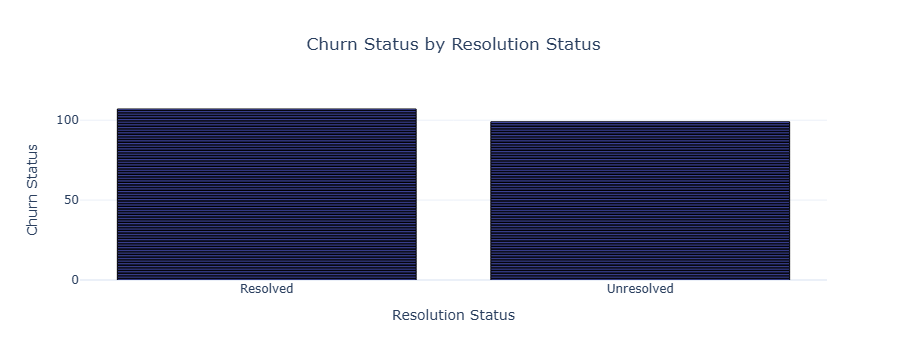

In [96]:
# Bar chart for Resolution Status and Churn Status
fig = plot_bar(customer_service_df, 
               x_column='ResolutionStatus', 
               y_column='ChurnStatus', 
               title="Churn Status by Resolution Status", 
               x_label="Resolution Status", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


The resolved issues were mostly feedback and complains

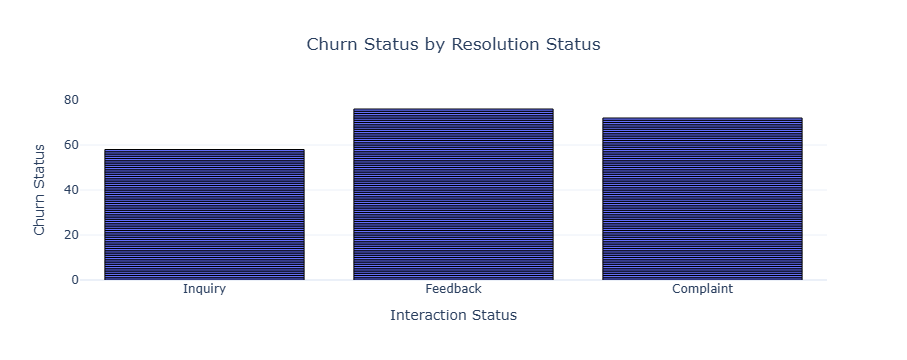

In [97]:
# Bar chart for Resolution Status and Churn Status
fig = plot_bar(customer_service_df, 
               x_column='InteractionType', 
               y_column='ChurnStatus', 
               title="Churn Status by Resolution Status", 
               x_label="Interaction Status", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


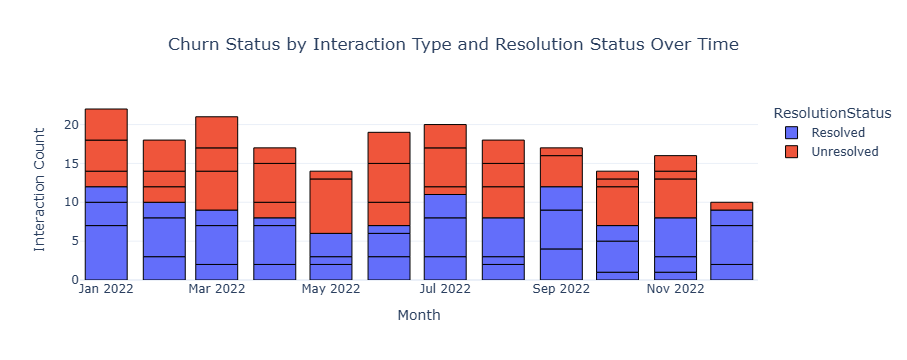

In [103]:
# Group by InteractionMonth, ChurnStatus, InteractionType, and ResolutionStatus
interaction_summary = churned_customer_service_df.groupby(['InteractionMonth', 'ChurnStatus', 'InteractionType', 'ResolutionStatus']) \
    .size().reset_index(name='InteractionCount')

# Stacked bar chart for InteractionType, ResolutionStatus, and ChurnStatus over Time (Month)
fig = plot_bar(interaction_summary, 
               x_column='InteractionMonth', 
               y_column='InteractionCount', 
               color_column='ResolutionStatus', 
               title="Churn Status by Interaction Type and Resolution Status Over Time", 
               x_label="Month", 
               y_label="Interaction Count", 
               orientation='v')
fig.show()


The most user with hight churn status were mobile users

In [106]:
online_activity_df
# Merging the customer demographics and ch33urn status DataFrames
online_activity_df = pd.merge(online_activity_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
online_activity_df = online_activity_df[online_activity_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
print(online_activity_df.head())


    CustomerID LastLoginDate  LoginFrequency    ServiceUsage  ChurnStatus
1            2    2023-12-05               5         Website            1
7            8    2023-04-22              17  Online Banking            1
9           10    2023-01-13              29  Online Banking            1
15          16    2023-03-15              41  Online Banking            1
17          18    2023-11-24              37         Website            1


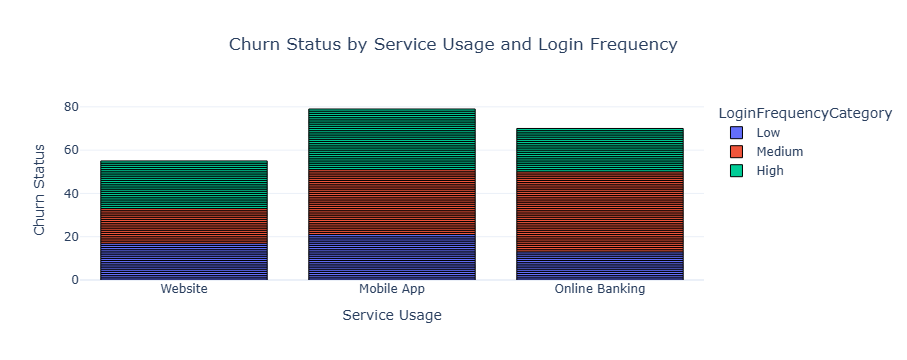

In [112]:
# Categorize LoginFrequency into bins (Low, Medium, High)
online_activity_df['LoginFrequencyCategory'] = pd.cut(
    online_activity_df['LoginFrequency'],
    bins=[0, 10, 30, 50, float('inf')],  # Example bins: [0-10, 11-30, 31-50, >50]
    labels=["Low", "Medium", "High", "Very High"]
)

# Now, let's plot the bar chart with LoginFrequency as color
fig = plot_bar(online_activity_df, 
               x_column='ServiceUsage', 
               y_column='ChurnStatus', 
               color_column='LoginFrequencyCategory', 
               title="Churn Status by Service Usage and Login Frequency", 
               x_label="Service Usage", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


### 🔍 Customer Churn Risk Analysis Recommendation

Based on the analysis, it has been observed that customers aged between 31–45 with low to middle income levels are at a higher risk of churn. Additionally, individuals who have purchased electronic equipment and subsequently submitted complaints or feedback—particularly those who primarily use the mobile app for service access—also show elevated churn tendencies.

### 📌 Recommendation: 
The bank should proactively flag these patterns and ensure the customer service team is made aware of them. When such behavioral indicators are detected, targeted outreach should be initiated to engage these customers, address their concerns, and reinforce their relationship with the bank.

# Data Preperation for Machine Learning

In [48]:
df = pd.merge(customer_demographics_df, churn_status_df, on='CustomerID', how='left')
df = pd.merge(df, transaction_history_df, on='CustomerID', how='left')
df = pd.merge(df, customer_service_df, on='CustomerID', how='left')
df = pd.merge(df, online_activity_df, on='CustomerID', how='left')


In [49]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage
0,1,62,M,Single,Low,0,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App
1,2,65,M,Married,Low,1,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website
2,2,65,M,Married,Low,1,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website
3,2,65,M,Married,Low,1,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website
4,2,65,M,Married,Low,1,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,0,2724,2022-09-08,232.06,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App
6808,1000,34,M,Widowed,Low,0,2917,2022-12-13,324.98,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App
6809,1000,34,M,Widowed,Low,0,2979,2022-06-15,375.34,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App
6810,1000,34,M,Widowed,Low,0,8594,2022-04-08,166.73,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App


In [50]:
# Drop Columns
df = df.drop(columns = ['TransactionID', 'TransactionDate', 
    'InteractionID', 'InteractionDate',
    'LastLoginDate'
   ], axis = 1)

In [43]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,AmountSpent,ProductCategory,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage
0,1,62,M,Single,Low,0,416.50,Electronics,Inquiry,Resolved,34,Mobile App
1,2,65,M,Married,Low,1,54.96,Clothing,Inquiry,Resolved,5,Website
2,2,65,M,Married,Low,1,197.50,Electronics,Inquiry,Resolved,5,Website
3,2,65,M,Married,Low,1,101.31,Furniture,Inquiry,Resolved,5,Website
4,2,65,M,Married,Low,1,397.37,Clothing,Inquiry,Resolved,5,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,0,232.06,Groceries,NaN,NaN,22,Mobile App
6808,1000,34,M,Widowed,Low,0,324.98,Books,NaN,NaN,22,Mobile App
6809,1000,34,M,Widowed,Low,0,375.34,Groceries,NaN,NaN,22,Mobile App
6810,1000,34,M,Widowed,Low,0,166.73,Books,NaN,NaN,22,Mobile App


In [52]:
import pandas as pd




# Step 1: Group by CustomerID and ProductCategory to calculate the total amount spent and total login frequency for each customer/category
customer_category_totals = df.groupby(["CustomerID", "ProductCategory"])["AmountSpent"].sum().reset_index()

# Step 2: Merge the total amount spent and total login frequency back into the original dataframe
df = pd.merge(df, customer_category_totals, on=["CustomerID", "ProductCategory"], suffixes=("", "_Total"))

# Step 3: Drop the original AmountSpent column
df = df.drop(columns=["AmountSpent"])

# Step 4: Rename the new column to "AmountSpent" to match the previous column name
df = df.rename(columns={"AmountSpent_Total": "AmountSpent"})

# Step 5: Remove duplicate rows (keeping only one row per customer and category)
df = df.drop_duplicates(subset=["CustomerID", "ProductCategory"])

# Display the result
df.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,ProductCategory,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage,AmountSpent
0,1,62,M,Single,Low,0,Electronics,Inquiry,Resolved,34,Mobile App,416.50
1,2,65,M,Married,Low,1,Clothing,Inquiry,Resolved,5,Website,452.33
2,2,65,M,Married,Low,1,Electronics,Inquiry,Resolved,5,Website,794.05
3,2,65,M,Married,Low,1,Furniture,Inquiry,Resolved,5,Website,101.31
4,2,65,M,Married,Low,1,Groceries,Inquiry,Resolved,5,Website,199.73


In [37]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,ProductCategory,InteractionType,ResolutionStatus,ServiceUsage,...,LoginFrequency,LoginFrequency,LoginFrequency,LoginFrequency,LoginFrequency,LoginFrequency,LoginFrequency,LoginFrequency,LoginFrequency,LoginFrequency
0,1,62,M,Single,Low,0,Electronics,Inquiry,Resolved,Mobile App,...,34,34,34,34,34,34,34,34,34,34
1,2,65,M,Married,Low,1,Clothing,Inquiry,Resolved,Website,...,5,5,5,5,5,5,5,5,5,5
2,2,65,M,Married,Low,1,Electronics,Inquiry,Resolved,Website,...,5,5,5,5,5,5,5,5,5,5
3,2,65,M,Married,Low,1,Furniture,Inquiry,Resolved,Website,...,5,5,5,5,5,5,5,5,5,5
4,2,65,M,Married,Low,1,Groceries,Inquiry,Resolved,Website,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,999,23,M,Widowed,High,0,Groceries,NaN,NaN,Website,...,23,23,23,23,23,23,23,23,23,23
3093,999,23,M,Widowed,High,0,Books,NaN,NaN,Website,...,23,23,23,23,23,23,23,23,23,23
3094,1000,34,M,Widowed,Low,0,Furniture,NaN,NaN,Mobile App,...,22,22,22,22,22,22,22,22,22,22
3095,1000,34,M,Widowed,Low,0,Groceries,NaN,NaN,Mobile App,...,22,22,22,22,22,22,22,22,22,22
